Автор:     Шестаков Михаил Сергеевич  
Telegram:  https://t.me/mshestakov1  
email:     mikhail-shestakov-2022@bk.ru  

# Определение оптимального тарифа для телеком-компании

Заказчик исследования: коммерческий департамент федерального оператора сотовой связи «Мегалайн».

Цель исследования: выявление наиболее прибыльного тарифа, из предлагаемых оператором ("Смарт" и "Ультра"), для оптимизации рекламного бюджета. 

***Описание тарифов***

"Смарт":

Ежемесячная плата: 550 рублей;

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;

Стоимость услуг сверх тарифного пакета:

- минута разговора: 3 рубля;

- сообщение: 3 рубля;

- 1 Гб интернет-трафика: 200 рублей/

 

"Ультра":

Ежемесячная плата: 1950 рублей;

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;

Стоимость услуг сверх тарифного пакета:

- минута разговора: 1 рубль;

- сообщение: 1 рубль;

- 1 Гб интернет-трафика: 150 рублей.

 

***Описание данных*** 

Исходные данные - выборка данных по результатам использования тарифов "Смарт" и "Ультра" в 2018 году.

Исходные данные содержатся в следующих файлах:

- users.csv — информация о пользователях;

- calls.csv — информация о звонках;

- messages.csv — информация о сообщениях;

- internet.csv — информация об интернет-сессиях;

- tariffs.csv — информация о тарифах.

 

В таблице users представлены следующие данные: 

- user_id — уникальный идентификатор пользователя;

- first_name — имя пользователя;

- last_name — фамилия пользователя;

- age — возраст пользователя (годы);

- reg_date — дата подключения тарифа;

- churn_date — дата прекращения пользования тарифом;

- city — город проживания пользователя;

- tariff — название тарифного плана.

 

В таблице calls представлены следующие данные: 

- id — уникальный номер звонка;

- call_date — дата звонка;

- duration — длительность звонка в минутах;

- user_id — идентификатор пользователя, сделавшего звонок.

 

В таблице messages представлены следующие данные: 

- id — уникальный номер сообщения;

- message_date — дата сообщения;

- user_id — идентификатор пользователя, отправившего сообщение.

 

В таблице internet представлены следующие данные: 

- id — уникальный номер сессии;

- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);

- session_date — дата интернет-сессии;

- user_id — идентификатор пользователя.

 

В таблице tariffs представлены следующие данные: 

- tariff_name — название тарифа;

- rub_monthly_fee — ежемесячная абонентская плата в рублях

- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;

- messages_included — количество сообщений в месяц, включённых в абонентскую плату;

- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);

- rub_per_minute — стоимость минуты разговора сверх тарифного пакета;

- rub_per_message — стоимость отправки сообщения сверх тарифного пакета;

- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета.

Содержание исследования:  
1. [Сведение исходных таблиц в одну и общий ее анализ](#open_file)  
 1.1. [Импорт библиотек](#import)  
 1.2. [Чтение исходных файлов в соответствующие датафреймы](#read)  
 1.3. [Общая информация о датафреймах.](#info_all)  
    * [Вывод](#final_1)  
    
    
2. [Предобработка данных](#data_preprocessing)  
 2.1. [Оптимизация типов данных](#change_type)  
    * [Датафрейм df_users](#change_type_df_users)  
    * [Датафрейм df_calls](#change_type_df_calls)  
    * [Датафрейм df_messages](#change_type_df_messages)  
    * [Датафрейм df_internet](#change_type_df_internet)  
    * [Датафрейм df_tariffs](#change_type_df_tariffs)  
    
 2.2. [Удаление выбросов](#remove)  
    * [Датафрейм df_calls"](#remove_df_calls)  
    * [Датафрейм df_internet"](#remove_df_internet)   
    
 2.3. [Оъединение таблиц](#united_table)  
    
 2.4. [Расчет выручки с каждого пользователя](#revenue)  
    * [Вывод](#final_2)      
    
    
3. [Анализ данных](#analysis)  
 3.1. [Функции расчёта](#functions)  
 3.2. [Сравнительный анализ поведения пользователей тарифов "Смарт" и "Ультра"](#comparative_analysis)    
    * [Вывод](#final_3)  
    

4. [Проверка гипотез](#hypothesis)  
    * [Вывод](#final_4)  
     

5. [Общий вывод](#final)  

## Общая информация о датафреймах.
<a id="open_file"></a>

### Импорт библиотек
<a id="import"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from functools import reduce
from scipy.stats import levene

### Чтение исходных файлов в соответствующие датафреймы
<a id="read"></a>

In [2]:
df_calls = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

### Общая информация о датафреймах.
<a id="info_all"></a>

Создаем словарь датафреймов:

In [3]:
dict_df = {'df_users' : df_users, 'df_calls' : df_calls, 'df_messages' : df_messages, 'df_internet' : df_internet,
           'df_tariffs' : df_tariffs}

Выводим общую информацию по каждому датафрейму:

In [4]:
for i in dict_df:
    print(i)
    print()
    print('Общая информация {}:'.format(i))
    display(dict_df[i].info(memory_usage='deep'))
    print('____________________________________________________')
    print()
    print('Описательная статистика строковых значений {}:'.format(i))
    display(dict_df[i].describe(include='object').T)
    print('____________________________________________________')
    print()
    print('Описательная статистика числовых значений {}:'.format(i))
    display(dict_df[i].describe().T)
    print('____________________________________________________')
    print()
    print('Процент пропущенных значений {}:'.format(i))
    display(dict_df[i].isna().mean()*100)
    print('____________________________________________________')
    print()
    print('Случайная выборка датафрейма {}:'.format(i))
    if dict_df[i].shape[0] > 15:
        display(dict_df[i].sample(n = 15, random_state = 0))
    else:
        display(dict_df[i].sample(n = dict_df[i].shape[0], random_state = 0))
    print('____________________________________________________')
    print('____________________________________________________')
    print()

df_users

Общая информация df_users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 229.6 KB


None

____________________________________________________

Описательная статистика строковых значений df_users:


,count,unique,top,freq
churn_date,38,33,2018-12-09,2
city,500,76,Москва,99
first_name,500,246,Радим,6
last_name,500,419,Андреенко,5
reg_date,500,270,2018-05-28,8
tariff,500,2,smart,351


____________________________________________________

Описательная статистика числовых значений df_users:


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


____________________________________________________

Процент пропущенных значений df_users:


user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64

____________________________________________________

Случайная выборка датафрейма df_users:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra
254,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra
283,1283,50,NaN,Москва,Юлий,Крючков,2018-09-07,smart
445,1445,40,NaN,Москва,Рауль,Иванов,2018-12-29,smart
461,1461,53,NaN,Москва,Ангелина,Фетисова,2018-11-21,ultra
15,1015,26,NaN,Челябинск,Рузана,Алюшина,2018-04-30,smart
316,1316,42,NaN,Улан-Удэ,Аурелия,Алымова,2018-11-29,smart
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
159,1159,64,NaN,Красноярск,Эльга,Аничкина,2018-11-28,smart
153,1153,59,NaN,Ульяновск,Евдокия,Одинцова,2018-10-18,smart


____________________________________________________
____________________________________________________

df_calls

Общая информация df_calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB


None

____________________________________________________

Описательная статистика строковых значений df_calls:


,count,unique,top,freq
id,202607,202607,1372_345,1
call_date,202607,365,2018-12-31,1435


____________________________________________________

Описательная статистика числовых значений df_calls:


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


____________________________________________________

Процент пропущенных значений df_calls:


id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

____________________________________________________

Случайная выборка датафрейма df_calls:


,id,call_date,duration,user_id
40510,1100_33,2018-09-23,0.00,1100
150407,1377_1254,2018-04-03,12.26,1377
48714,1121_371,2018-12-27,11.24,1121
103039,1264_178,2018-10-22,4.46,1264
52767,1133_32,2018-12-08,6.41,1133
131357,1337_146,2018-06-26,3.30,1337
67046,1171_71,2018-09-28,14.44,1171
69132,1174_172,2018-07-29,7.93,1174
17461,1048_251,2018-12-27,8.21,1048
83622,1208_474,2018-05-04,6.47,1208


____________________________________________________
____________________________________________________

df_messages

Общая информация df_messages:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 16.4 MB


None

____________________________________________________

Описательная статистика строковых значений df_messages:


,count,unique,top,freq
id,123036,123036,1323_261,1
message_date,123036,364,2018-12-31,859


____________________________________________________

Описательная статистика числовых значений df_messages:


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


____________________________________________________

Процент пропущенных значений df_messages:


id              0.0
message_date    0.0
user_id         0.0
dtype: float64

____________________________________________________

Случайная выборка датафрейма df_messages:


,id,message_date,user_id
94381,1385_1090,2018-05-03,1385
109956,1443_55,2018-12-02,1443
75655,1320_9,2018-09-19,1320
118304,1481_75,2018-10-06,1481
91567,1379_253,2018-09-02,1379
85017,1356_34,2018-07-08,1356
97880,1401_212,2018-04-20,1401
67144,1285_332,2018-06-10,1285
60737,1268_52,2018-09-22,1268
33081,1145_734,2018-12-27,1145


____________________________________________________
____________________________________________________

df_internet

Общая информация df_internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 22.2 MB


None

____________________________________________________

Описательная статистика строковых значений df_internet:


,count,unique,top,freq
id,149396,149396,1323_261,1
session_date,149396,365,2018-12-31,1057


____________________________________________________

Описательная статистика числовых значений df_internet:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


____________________________________________________

Процент пропущенных значений df_internet:


Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

____________________________________________________

Случайная выборка датафрейма df_internet:


,Unnamed: 0,id,mb_used,session_date,user_id
26617,26617,1092_283,828.84,2018-08-02,1092
112390,112390,1380_519,912.76,2018-07-20,1380
99054,99054,1332_28,0.00,2018-06-28,1332
86235,86235,1292_351,451.91,2018-09-24,1292
6819,6819,1023_55,161.65,2018-12-19,1023
41366,41366,1145_102,277.28,2018-05-25,1145
49486,49486,1171_188,360.05,2018-09-21,1171
38558,38558,1135_38,0.00,2018-11-12,1135
135048,135048,1453_269,1087.96,2018-11-29,1453
140663,140663,1472_337,336.81,2018-01-22,1472


____________________________________________________
____________________________________________________

df_tariffs

Общая информация df_tariffs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes


None

____________________________________________________

Описательная статистика строковых значений df_tariffs:


,count,unique,top,freq
tariff_name,2,2,smart,1


____________________________________________________

Описательная статистика числовых значений df_tariffs:


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


____________________________________________________

Процент пропущенных значений df_tariffs:


messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

____________________________________________________

Случайная выборка датафрейма df_tariffs:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


____________________________________________________
____________________________________________________



***Вывод:***
<a id="final_1"></a>
1. Датафрейм df_users (информация о пользователях):  
 1.1. В датафрейме 500 строк и 8 полей. Размер датафрейма 229.6 KB.  
 1.2. Поле "reg_date" (дата подключения тарифа) имеет тип "object". Следует изменить на тип "date".  
 1.3. Поле "churn_date" (дата прекращения пользования тарифом) имеет тип "object". Следует изменить на тип "date".  
 1.4. Поле "tariff" (название тарифного плана) – object. В поле всего 2 уникальных значения, поэтому целесообразно заменить тип на "category".  
 1.5. В поле "churn_date" (дата прекращения пользования тарифом) пропущено 92.4% значений. То есть на момент выгрузки данных тариф ещё действовал. Обработка данных пропусков не требуется.  
2. Датафрейм df_calls (информация о звонках):  
 2.1. В датафрейме 202607 строк и 4 поля. Размер датафрейма 28.6 MB, пропущенных значений нет.  
 2.2. Поле "call_date" (дата звонка) имеет тип "object". Следует изменить на тип "date".  
 2.3. Минимальное значения поля "duration" (длительность звонка) - 0. Это характерно для пропущенных звонков, обрабатывать эти
      значения не требуется.   
3. Датафрейм df_messages (информация о сообщениях):  
 3.1. В датафрейме 123036 строк и 3 поля. Размер датафрейма 16.4 MB, пропущенных значений нет.  
 3.2. Поле "message_date" (дата сообщения) имеет тип "object". Следует изменить на тип "date".  
4. Датафрейм df_internet (информация об интернет-сессиях):  
 4.1. В датафрейме 149396 строк и 5 полей. Размер датафрейма 22.2 MB, пропущенных значений нет.  
 4.2. Поле "Unnamed: 0" соответствует индексу строки. После дополнительной проверки имеет смысл его удалить.  
 4.3. Поле "session_date" (дата интернет-сессии) имеет тип "object". Следует изменить на тип "date".  
 4.4. Минимальное значения поля "mb_used" (объём потраченного за сессию интернет-трафика (в мегабайтах)) - 0. Это характерно для сессий, во время которых потрачено менее 1 MB, - обрабатывать эти значения не требуется.  
5. Датафрейм df_tariffs (информация о тарифах):  
 5.1. В датафрейме 2 строки и 8 полей. Размер датафрейма 364.0 bytes, пропущенных значений нет.  

## Предобработка данных
<a id="data_preprocessing"></a>

### Оптимизация типов данных
<a id="change_type"></a>

#### Датафрейм df_users
<a id="change_type_df_users"></a>

Приводим даты к типу "datetime":

In [5]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date']).dt.to_period('M')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date']).dt.to_period('M')

Приводим поля "user_id" и "age" к типам "uint16" и "uint8" соответственно:

In [6]:
df_users = df_users.astype({'user_id' : 'uint16', 'age' : 'uint8'})

Приводим значения текстовых полей к единому (нижнему) регистру:

In [7]:
text_list_users = ['city', 'first_name', 'last_name', 'tariff']             #Список полей, содержащих текстовые данные
for i in text_list_users:                                                        #Проходим циклом по списку
    df_users[i] = df_users[i].apply(lambda x: x.lower())                   #Переводим в нижний регистр

Рассчитываем долю уникальных значений полей "city" и "tariff". Если доля меньше 0.5, заменяем тип данных полей на "category".

In [8]:
cat_list_users = ['city', 'tariff']                                          #Список полей с категориальными значениями
perc_list_users = []                                                           #Список для полей у которых будет изменен тип
for i in cat_list_users:                                                     #Цикл по полям с категориальными значениями
    percent = len(df_users[i].unique()) / len(df_users)                     #процент уникальных значений
    print('Процент уникальных значений {} от общего количества = {:0.2%}'
        .format(i, percent))
    if percent < 50:                                                        #Если процент уникальных значений < 50
        perc_list_users.append(i)                                              #Добавляем поле в список для изменения типа
        
if len(perc_list_users) != 0:                                                  #Если список не пустой
    for i in perc_list_users:                                                  #Проходим циклом по списку полей для изменения типа
        df_users = df_users.astype({i : 'category'})                        #меняем тип поля на "category"

Процент уникальных значений city от общего количества = 15.20%
Процент уникальных значений tariff от общего количества = 0.40%


Выводим общую информацию по датафрейму df_users:

In [9]:
df_users.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   user_id     500 non-null    uint16   
 1   age         500 non-null    uint8    
 2   churn_date  38 non-null     period[M]
 3   city        500 non-null    category 
 4   first_name  500 non-null    object   
 5   last_name   500 non-null    object   
 6   reg_date    500 non-null    period[M]
 7   tariff      500 non-null    category 
dtypes: category(2), object(2), period[M](2), uint16(1), uint8(1)
memory usage: 114.9 KB


Типы данных изменены, объем таблицы уменьшен с 229.6 KB до 115.3 KB.

#### Датафрейм df_calls
<a id="change_type_df_calls"></a>

Приводим даты к типу "datetime":

In [10]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date']).dt.to_period('M')

Приводим поле "user_id" к типу "uint16":

In [11]:
df_calls['user_id'] = df_calls['user_id'].astype('uint16')

Удаляем из значений поля "id" первую чаcть - "user_id", изменяем тип на "uint16" и переименовываем поле:

In [12]:
df_calls['id'] = df_calls['id'].apply(lambda x: x.split('_')[1]).astype('uint16')
df_calls.rename(columns = {'id' : 'call_number'}, inplace=True)

Выводим общую информацию по датафрейму df_calls:

In [13]:
df_calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype    
---  ------       --------------   -----    
 0   call_number  202607 non-null  uint16   
 1   call_date    202607 non-null  period[M]
 2   duration     202607 non-null  float64  
 3   user_id      202607 non-null  uint16   
dtypes: float64(1), period[M](1), uint16(2)
memory usage: 3.9 MB


Типы данных изменены, объем таблицы уменьшен с 28.6 MB до 2.7 MB.

#### Датафрейм df_messages
<a id="change_type_df_messages"></a>

Приводим даты к типу "datetime":

In [14]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date']).dt.to_period('M')

Приводим поле "user_id" к типу "uint16":

In [15]:
df_messages['user_id'] = df_messages['user_id'].astype('uint16')

Удаляем из значений поля "id" первую чаcть - "user_id", изменяем тип на "uint16" и переименовываем поле:

In [16]:
df_messages['id'] = df_messages['id'].apply(lambda x: x.split('_')[1]).astype('uint16')
df_messages.rename(columns = {'id' : 'number_messages'}, inplace=True)

Выводим общую информацию по датафрейму df_messages:

In [17]:
df_messages.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype    
---  ------           --------------   -----    
 0   number_messages  123036 non-null  uint16   
 1   message_date     123036 non-null  period[M]
 2   user_id          123036 non-null  uint16   
dtypes: period[M](1), uint16(2)
memory usage: 1.4 MB


Типы данных изменены, объем таблицы уменьшен с 16.4 MB до 1.4 MB.

#### Датафрейм df_internet
<a id="change_type_df_internet"></a>

Приводим даты к типу "datetime":

In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date']).dt.to_period('M')

Приводим поле "user_id" к типу "uint16":

In [19]:
df_internet['user_id'] = df_internet['user_id'].astype('uint16')

Убираем из таблицы поле "Unnamed: 0":

In [20]:
df_internet = df_internet[['id', 'mb_used', 'session_date', 'user_id']]

 Удаляем из значений поля "id" первую чаcть - "user_id", изменяем тип на "uint16" и переименовываем поле:

In [21]:
df_internet['session_number'] = df_internet['id'].apply(lambda x: x.split('_')[1]).astype('uint16')
df_internet = df_internet[['session_number', 'mb_used', 'session_date', 'user_id']]

Выводим общую информацию по датафрейму df_internet:

In [22]:
df_internet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype    
---  ------          --------------   -----    
 0   session_number  149396 non-null  uint16   
 1   mb_used         149396 non-null  float64  
 2   session_date    149396 non-null  period[M]
 3   user_id         149396 non-null  uint16   
dtypes: float64(1), period[M](1), uint16(2)
memory usage: 2.8 MB


Типы данных изменены, объем таблицы уменьшен с 22.2 MB до 2.8 MB. Удалено поле "Unnamed: 0".

#### Датафрейм df_tariffs
<a id="change_type_df_tariffs"></a>

Приводим поля "messages_included", "mb_per_month_included", "minutes_included", "rub_monthly_fee" к типу "uint16", а "rub_per_gb", "rub_per_message" и "rub_per_minute" к типу "uint8":

In [23]:
df_tariffs = df_tariffs.astype({'messages_included' : 'uint16', 'mb_per_month_included' : 'uint16',
                                'minutes_included' : 'uint16', 'rub_monthly_fee' : 'uint16', 'rub_per_gb' : 'uint8',
                                'rub_per_message' : 'uint8', 'rub_per_minute' : 'uint8', 'tariff_name' : 'category'})

Выводим общую информацию по датафрейму df_tariffs:

In [24]:
df_tariffs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      uint16  
 1   mb_per_month_included  2 non-null      uint16  
 2   minutes_included       2 non-null      uint16  
 3   rub_monthly_fee        2 non-null      uint16  
 4   rub_per_gb             2 non-null      uint8   
 5   rub_per_message        2 non-null      uint8   
 6   rub_per_minute         2 non-null      uint8   
 7   tariff_name            2 non-null      category
dtypes: category(1), uint16(4), uint8(3)
memory usage: 384.0 bytes


Типы данных изменены, объем таблицы уменьшен с 364.0 bytes до 274.0 bytes.

### Удаление выбросов
<a id="remove"></a>

Определяем наличие выбросов по времени звонка и объему трафика за сессию. Убираем значения, не попадающие в диапазон от от Q1-3*IQR до Q3+3*IQR.

***Датафрейм df_calls***
<a id="remove_df_calls"></a>

Проверяем на выбросы:

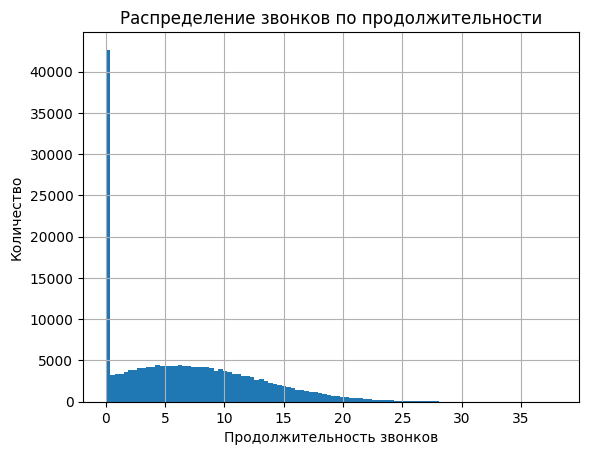

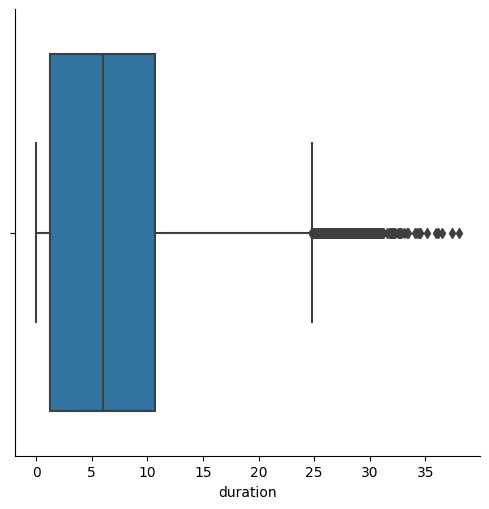

In [25]:
ax = df_calls['duration'].hist(bins=100)
ax.set_title('Распределение звонков по продолжительности')
ax.set_xlabel('Продолжительность звонков')
ax.set_ylabel('Количество')
ax1 = sns.catplot(kind='box', x='duration', data=df_calls)
plt.show()

Удаляем выбросы:

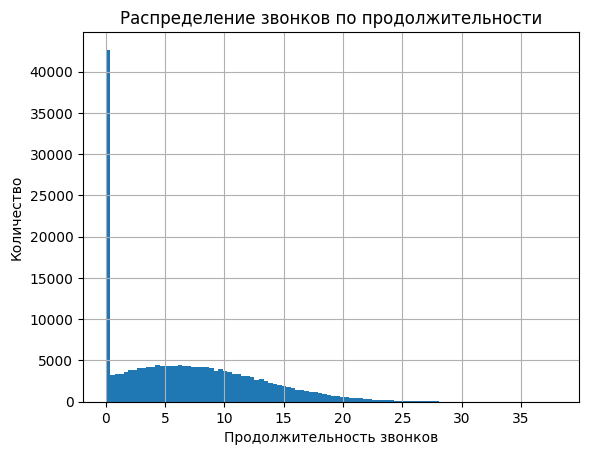

Удалено строк: 0


In [26]:
del_calls = len(df_calls.index)                             # число строк в таблице
q25 = df_calls['duration'].quantile(0.25)                               # вычисляем 1-ую квантиль
q75 = df_calls['duration'].quantile(0.75)                               # вычисляем 3-ую квантиль                               
minimum = q25 - 3 * (q75 - q25)                               # нижняя граница
maximum = q75 + 3 * (q75 - q25)
df_calls = df_calls.loc[(df_calls['duration'] >= minimum) & (df_calls['duration'] <= maximum)].reset_index(drop=True)
ax = df_calls['duration'].hist(bins=100)
ax.set_title('Распределение звонков по продолжительности')
ax.set_xlabel('Продолжительность звонков')
ax.set_ylabel('Количество')
plt.show()
print('Удалено строк:', del_calls - len(df_calls.index))

***Датафрейм df_internet***
<a id="remove_df_internet"></a>

Проверяем на выбросы:

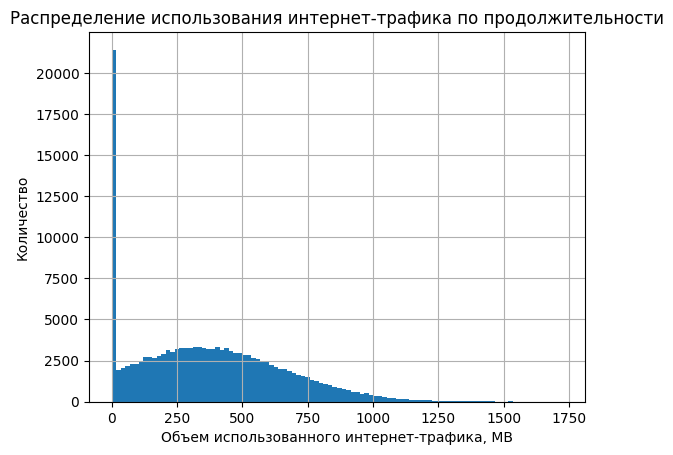

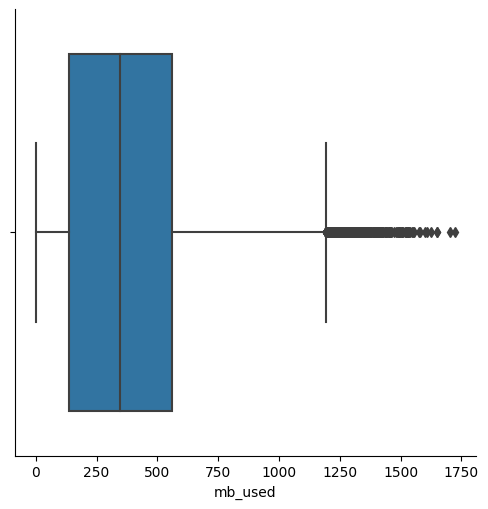

In [27]:
ax = df_internet['mb_used'].hist(bins=100)
ax.set_title('Распределение использования интернет-трафика по продолжительности')
ax.set_xlabel('Объем использованного интернет-трафика, MB')
ax.set_ylabel('Количество')
ax1 = sns.catplot(kind='box', x='mb_used', data=df_internet)
plt.show()

Удаляем выбросы, если таковые есть:

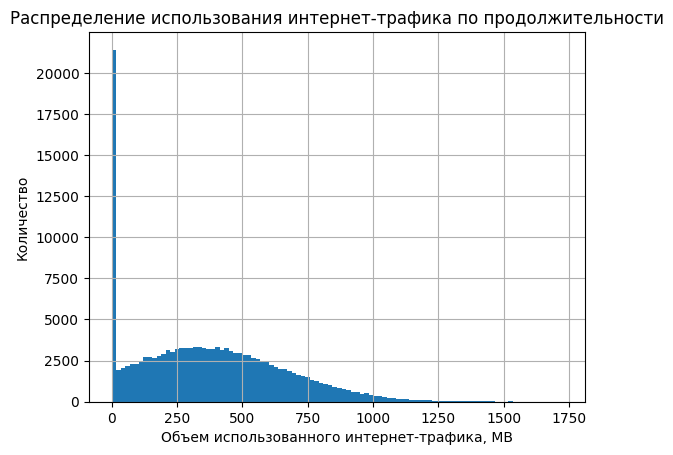

Удалено строк: 0


In [28]:
del_internet = len(df_internet.index)                             # число строк в таблице
q25 = df_internet['mb_used'].quantile(0.25)                               # вычисляем 1-ую квантиль
q75 = df_internet['mb_used'].quantile(0.75)                               # вычисляем 3-ую квантиль                               
minimum = q25 - 3 * (q75 - q25)                               # нижняя граница
maximum = q75 + 3 * (q75 - q25)
df_internet = df_internet.loc[(df_internet['mb_used'] >= minimum) & (df_internet['mb_used'] <= maximum)].reset_index(drop=True)
ax = df_internet['mb_used'].hist(bins=100)
ax.set_title('Распределение использования интернет-трафика по продолжительности')
ax.set_xlabel('Объем использованного интернет-трафика, MB')
ax.set_ylabel('Количество')
plt.show()
print('Удалено строк:', del_internet - len(df_internet.index))

### Объединение таблиц
<a id="united_table"></a>

Округляем минуты до целых значений в большую сторону, согласно алгоритму подсчета времени звонка, применяемому оператором:

In [29]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('uint16')

Создаем функцию подготовки датафрейсов к объединению. Группируем таблицы по полю "user_id" (уникальный идентификатор пользователя) и месяцам использования тарифа:

In [30]:
def group_df(df, user_id, date, param, num):
    if param != 0:
        df_group = (
            df
            .groupby([user_id, date])
            .agg({param : 'sum', num : 'count'})
            .reset_index()
            .rename(columns = {date : 'active_month'})
        )
    else:
        df_group = (
            df
            .groupby([user_id, date])
            .agg({num : 'count'})
            .reset_index()
            .rename(columns = {date : 'active_month'})
        )
    return df_group   

Подготавливаем датафреймы к объединению:

In [31]:
df_calls_group = group_df(df_calls, 'user_id', 'call_date', 'duration', 'call_number')
df_messages_group = group_df(df_messages, 'user_id', 'message_date', 0, 'number_messages')
df_internet_group = group_df(df_internet, 'user_id', 'session_date', 'mb_used', 'session_number')

Объединяем таблицы:

In [32]:
# Создаем список датафреймов с данными по использованию тарифов
df_list = [df_calls_group, df_messages_group, df_internet_group]

# Объединяем датафреймы с данными по использованию тарифов
df_full = reduce(lambda left,right: pd.merge(left, right, on=['user_id', 'active_month'], how='outer'), df_list).fillna(0)


# Добавляем в датафрейм "df_full" данные по пользователям и тарифам.
# Поскольку могут быть пользователи, подключившиеся к тарифу, но не пользующиеся услугами, при присоединении "df_users"
# используем "right".
df_full = (
    df_full
    .merge(df_users, how='right', left_on='user_id', right_on='user_id')
    .merge(df_tariffs, how='left', left_on='tariff', right_on='tariff_name')
    .sort_values(by=['user_id', 'active_month'])
          )

# Оставляем в df_full только поля, необходимые для анализа
df_full = df_full[['user_id', 'city', 'reg_date', 'active_month', 'duration', 'call_number', 'number_messages', 'session_number',
                   'mb_used', 'tariff', 'messages_included', 'mb_per_month_included', 'minutes_included',
                   'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']]

Заменяем в полях "duration" (продолжительность звонков), "call_number" (количество звонков), "number_messages" (количество сообщений), "session_number" (количество интернет-сессий) и "mb_used" (количество использованного интернет-трафика) пропуски на 0, так как от соответствующих пользователей нет выручки, что нужно учесть в расчетах:

In [33]:
df_full[['duration', 'call_number', 'number_messages', 'session_number', 'mb_used']] = (
    df_full[['duration', 'call_number', 'number_messages', 'session_number', 'mb_used']]
    .fillna(0)
    .astype({'duration' : 'uint16', 'call_number' : 'uint16', 'number_messages' : 'uint16', 'session_number' : 'uint16'})
)

Округляем объём потраченного за сессию интернет-трафика до гигабайтов в большую сторону, в соответствие с алгоритмом учета оператора:

In [34]:
df_full['gb_used'] = np.ceil(df_full['mb_used'] / 1024).astype('uint16')

Переводим объём интернет-трафика, включённого в абонентскую плату ("mb_per_month_included"), в гигабайты:

In [35]:
df_full['gb_per_month_included'] = (df_full['mb_per_month_included'] / 1024).astype('uint16')

Выводим 5 строк объединённой таблицы:

In [36]:
df_full.sample(n=5, random_state=0)

,user_id,city,reg_date,active_month,duration,call_number,number_messages,session_number,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included
527,1083,сочи,2018-04,2018-11,610,81,56,56,19383.88,smart,50,15360,500,550,200,3,3,19,15
883,1142,новосибирск,2018-03,2018-03,81,10,8,14,4986.89,smart,50,15360,500,550,200,3,3,5,15
2847,1440,москва,2018-05,2018-11,169,27,97,36,17718.92,ultra,1000,30720,3000,1950,150,1,1,18,30
3028,1471,вологда,2018-02,2018-06,650,111,94,19,8792.86,ultra,1000,30720,3000,1950,150,1,1,9,30
2265,1358,ставрополь,2018-02,2018-11,607,87,66,31,8496.84,smart,50,15360,500,550,200,3,3,9,15


Выводим общую информацию по объединённому датафрейму:

In [37]:
df_full.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                3216 non-null   uint64   
 1   city                   3216 non-null   category 
 2   reg_date               3216 non-null   period[M]
 3   active_month           3214 non-null   period[M]
 4   duration               3216 non-null   uint16   
 5   call_number            3216 non-null   uint16   
 6   number_messages        3216 non-null   uint16   
 7   session_number         3216 non-null   uint16   
 8   mb_used                3216 non-null   float64  
 9   tariff                 3216 non-null   category 
 10  messages_included      3216 non-null   uint16   
 11  mb_per_month_included  3216 non-null   uint16   
 12  minutes_included       3216 non-null   uint16   
 13  rub_monthly_fee        3216 non-null   uint16   
 14  rub_per_gb             3

В таблице 3216 строк и 17 полей. В двух строках пропущены значения поля "active_month" - есть пользователи, подключившиеся к тарифу, но услугами не пользующиеся услугами.

### Расчет выручки с каждого пользователя
<a id="revenue"></a>

Рассчитываем ежемесячную выручку с каждого пользователя:

In [38]:
def revenue(df):
    rev = df['rub_monthly_fee']
    if df['duration'] > df['minutes_included']:
        rev += (df['duration'] - df['minutes_included']) * df['rub_per_minute']
    if df['number_messages'] > df['messages_included']:
        rev += (df['number_messages'] - df['messages_included']) * df['rub_per_message']
    if df['gb_used'] > df['gb_per_month_included']:
        rev += (df['gb_used'] - df['gb_per_month_included']) * df['rub_per_gb']
    return rev

In [39]:
df_full['revenue'] = df_full.apply(revenue, axis=1)

Рассчитываем ежемесячную переплату за перерасход тарифа:

In [40]:
df_full['overpayment'] = df_full['revenue'] - df_full['rub_monthly_fee']

Выводим 5 строк объединённой таблицы:

In [41]:
df_full.sample(n=5, random_state=0)

,user_id,city,reg_date,active_month,duration,call_number,number_messages,session_number,mb_used,tariff,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,revenue,overpayment
527,1083,сочи,2018-04,2018-11,610,81,56,56,19383.88,smart,...,15360,500,550,200,3,3,19,15,1698,1148
883,1142,новосибирск,2018-03,2018-03,81,10,8,14,4986.89,smart,...,15360,500,550,200,3,3,5,15,550,0
2847,1440,москва,2018-05,2018-11,169,27,97,36,17718.92,ultra,...,30720,3000,1950,150,1,1,18,30,1950,0
3028,1471,вологда,2018-02,2018-06,650,111,94,19,8792.86,ultra,...,30720,3000,1950,150,1,1,9,30,1950,0
2265,1358,ставрополь,2018-02,2018-11,607,87,66,31,8496.84,smart,...,15360,500,550,200,3,3,9,15,919,369


***Вывод:***
<a id="final_2"></a>
1. Оптимизированы типы полей таблиц.  
2. Произведена проверка значений продолжительности телефонных звонков и объема использованного интернет-трафика - выбросы отсутствуют.  
3. Исходные таблицы объединены в датафрейм df_full, произведен расчет ежемесячной выручки с каждого пользователя из выборки.

## Анализ данных
<a id="analysis"></a>

### Функции расчёта
<a id="functions"></a>

Создаем функции подсчета количества пользователей тарифа и определения городов, в которых тариф наиболее распространен.

In [42]:
'''функция подсчета количества пользователей тарифа'''
def city(trf):
    df_smart_client = (
        df_users
        .loc[df_users['tariff'] == trf]
        .groupby('city')['user_id'].count()
        .sort_values(ascending=False)
        .reset_index()
        .query('user_id != 0')
    )
    users_count = df_smart_client['user_id'].sum()

    df_smart_city = (
        df_smart_client
        .assign(percent = 100 * df_smart_client['user_id'] / df_smart_client['user_id'].sum())
        .drop(['user_id'], axis=1)
    )
    print('Города, в которых тариф "{}" наиболее распространен:'.format(trf))
    display(df_smart_city.head(5))
    print('______________________________')
    return None

Создаем функцию генерации датафрейма с данными по использованию определенного тарифа:

In [43]:
def tariff_func(trf):
    return df_full.loc[df_full['tariff'] == trf]

Создаем функции подсчета нулевых значений:

In [44]:
def zero(trf):
    df_tariff = tariff_func(trf)
    zero_duration = df_tariff.loc[df_tariff['duration'] == 0, 'duration'].count()
    zero_messages = df_tariff.loc[df_tariff['number_messages'] == 0, 'number_messages'].count()
    zero_mb_used = df_tariff.loc[df_tariff['gb_used'] == 0, 'gb_used'].count()
    print('Суммарное время использования тарифа всеми пользователями: {} месяцев'.format(df_tariff.shape[0]))
    print('Количество нулевых значений поля "duration" (длительность звонка): {} ({:,.2%})'.format(zero_duration, zero_duration / df_tariff.shape[0]))
    print('Количество нулевых значений поля "number_messages" (число сообщений): {} ({:,.2%})'.format(zero_messages, zero_messages / df_tariff.shape[0]))
    print('Количество нулевых значений поля "mb_used" (объём использованного интернет-трафика): {} ({:,.2%})'.format(zero_mb_used, zero_mb_used / df_tariff.shape[0]))

### Сравнительный анализ поведения пользователей тарифов "Смарт" и "Ультра"
<a id="comparative_analysis"></a>

Создаем список тарифов:

In [45]:
tariff_list = ['smart', 'ultra']

Определяем количество пользователей тарифов:

In [46]:
df_full.pivot_table(index= 'tariff', values= 'user_id', aggfunc= {'user_id': 'nunique'})

,user_id
tariff,
smart,351
ultra,149


Определяем города, в которых эти тарифы наиболее распространены:

In [47]:
for i in tariff_list:
    city(i)

Города, в которых тариф "smart" наиболее распространен:


,city,percent
0,москва,19.088319
1,санкт-петербург,8.547009
2,казань,3.703704
3,новосибирск,3.133903
4,ульяновск,2.849003


______________________________
Города, в которых тариф "ultra" наиболее распространен:


,city,percent
0,москва,21.476510
1,санкт-петербург,6.040268
2,уфа,4.026846
3,краснодар,3.355705
4,новосибирск,3.355705


______________________________


Рассчитываем среднее переплаты за перерасход тарифа:

In [48]:
df_full.pivot_table(index= 'tariff', values= 'overpayment', aggfunc= {'overpayment': 'mean'})

,overpayment
tariff,
smart,739.641704
ultra,120.030426


Определяем количество нулевых значений полей "duration" (длительность звонка), "number_messages" (число сообщений) и "mb_used" (объём потраченного интернет-трафика):

In [49]:
for i in tariff_list:
    print('Тариф {}:'.format(i))
    zero(i)
    print('_______________________________________________________')
    print()

Тариф smart:
Суммарное время использования тарифа всеми пользователями: 2230 месяцев
Количество нулевых значений поля "duration" (длительность звонка): 9 (0.40%)
Количество нулевых значений поля "number_messages" (число сообщений): 308 (13.81%)
Количество нулевых значений поля "mb_used" (объём использованного интернет-трафика): 3 (0.13%)
_______________________________________________________

Тариф ultra:
Суммарное время использования тарифа всеми пользователями: 986 месяцев
Количество нулевых значений поля "duration" (длительность звонка): 39 (3.96%)
Количество нулевых значений поля "number_messages" (число сообщений): 191 (19.37%)
Количество нулевых значений поля "mb_used" (объём использованного интернет-трафика): 12 (1.22%)
_______________________________________________________



***Распределения исследуемых параметров***

Рассчитываем среднее, дисперсию и стандартное отклонение исследуемых параметров:

In [50]:
df_full.pivot_table(index= 'tariff', values= ['duration', 'gb_used', 'number_messages'], aggfunc= {'duration': [np.mean, np.var, np.std], 
                             'gb_used': [np.mean, np.var, np.std], 
                             'number_messages': [np.mean, np.var, np.std]})

duration                               gb_used                       \
              mean         std            var       mean       std        var   
tariff                                                                          
smart   417.747534  190.476754   36281.393836  16.321525  5.756167  33.133453   
ultra   526.089249  317.887549  101052.493549  19.474645  9.868057  97.378544   

       number_messages                          
                  mean        std          var  
tariff                                          
smart        33.369058  28.230396   796.955256  
ultra        49.313387  47.806040  2285.417425

***Диаграммы***

Строим диаграммы распределения и размаха продолжительности звонков, количества сообщений и объема использованного интернет-трафика:

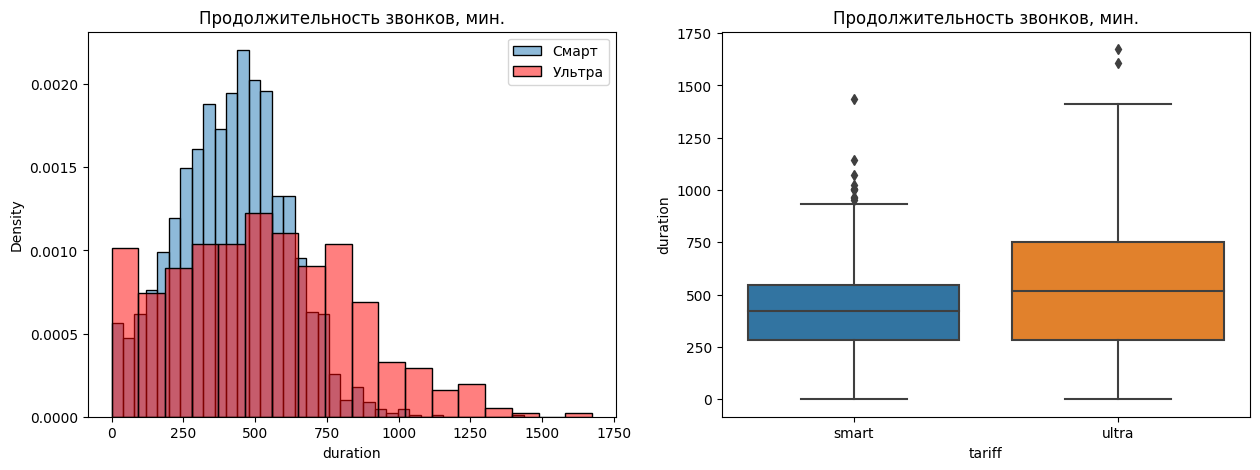

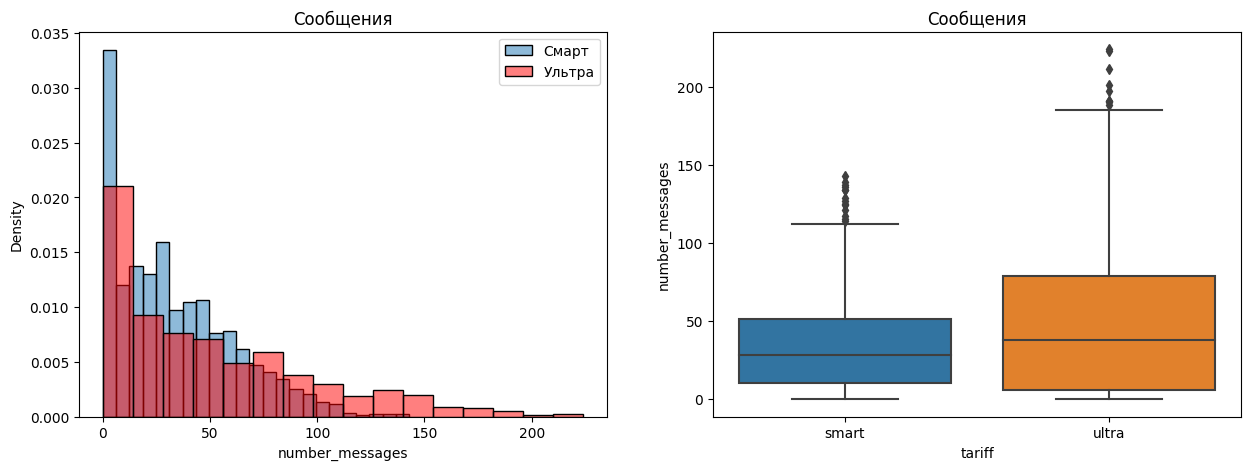

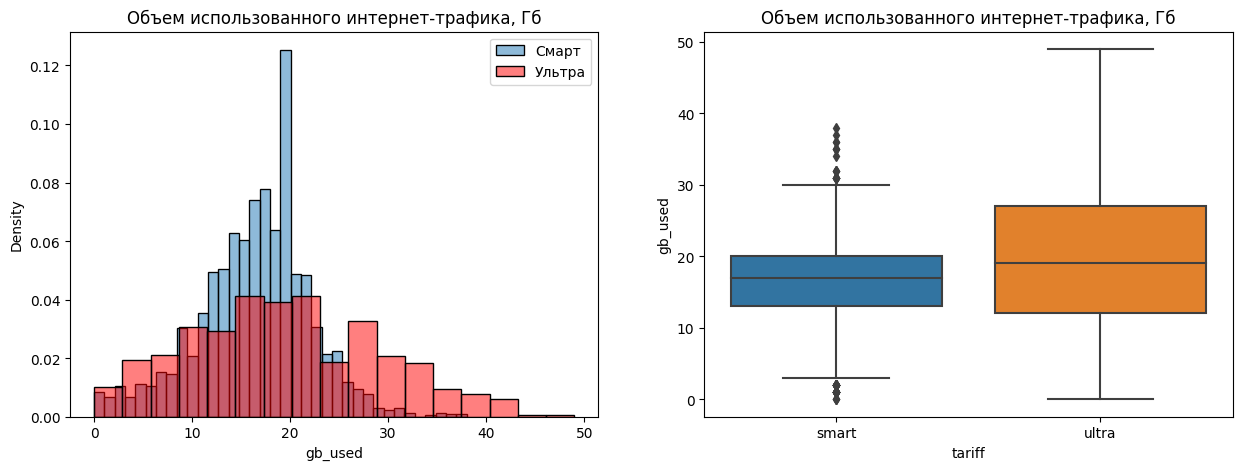

In [51]:
dict_param = {'duration' : 'Продолжительность звонков, мин.', 'number_messages' : 'Сообщения',
              'gb_used' : 'Объем использованного интернет-трафика, Гб'}
for i in dict_param:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].set_title(dict_param[i])
    sns.histplot(tariff_func('smart')[i], stat="density", kde=False, ax=ax[0], label="Смарт", alpha=0.5)
    sns.histplot(tariff_func('ultra')[i], stat="density", kde=False, ax=ax[0], label="Ультра", color='red', alpha=0.5)
    ax[0].legend()
    ax[1].set_title(dict_param[i])
    sns.boxplot(y=i, x='tariff', data=df_full, ax=ax[1], orient='v')

***Вывод:***
<a id="final_3"></a>
1. В выборке большинство пользователей обоих тарифов - из Москвы.  
2. Пользователи обоих тарифов в данной выборке из предлагаемых услуг реже всего используют сообщения: для тарифа "Смарт" нулевых значений - 308 (13.81%), для "Ультра" - 191 (19.37%).  
3. Пользователи "Смарт" значительно чаще выходят за рамки лимитов, установленных тарифом: переплата за перерасход в среднем составляет 740 рублей в месяц, тогда как у пользователей "Ультра" - 120.  
4. Стандартные отклонения параметров тарифа "Ультра" значительно выше, нежели тарифа "Смарт": среди пользователей "Ультра" встречаются как более активные, так и пассивные, нежели пользователи "Смарт". Отчасти такие показания стандартных отклонений могут быть обусловлены большей выборкой пользователей тарифа "Смарт" - 351 против 149 пользователей "Ультра".  
5. Диаграммы распределения ежемесячного количества сообщений смещены вправо. Это говорит о выбросах: часть клиентов отправляют сообщения значительно чаще среднего значения. Низкое среднее обусловлено большим количеством нулевых значений: данный вид услуг из предлагаемых наименее востребован.

## Проверка гипотез
<a id="hypothesis"></a>

***Гипотеза H0: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»  
Гипотеза H1: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»***

Собираем данные по выручке с тарифа "Смарт":

In [52]:
df_smart_revenue = (
    df_full
    .loc[df_full['tariff'] == 'smart']
    .groupby('user_id')['revenue']
    .sum()
    .astype('uint16')
    .reset_index()
           )

Собираем данные по выручке с тарифа "Ультра":

In [53]:
df_ultra_revenue = (
    df_full
    .loc[df_full['tariff'] == 'ultra']
    .groupby('user_id')['revenue']
    .sum()
    .astype('uint16')
    .reset_index()
           )

Задаем критический уровень статистической значимости:

In [54]:
alpha = .05

Сравниваем дисперсии выборок:

In [55]:
var_tariff = levene(df_smart_revenue['revenue'], df_ultra_revenue['revenue'])

In [56]:
if var_tariff.pvalue < alpha:
    print('Небольшое значение p ({}) предполагает, что выборки не имеют одинаковой дисперсии.'.format(var_tariff.pvalue))
else:
    print('Значение p ({}) предполагает, что выборки имеют одинаковую дисперсию.'.format(var_tariff.pvalue))

Небольшое значение p (5.256526064390166e-06) предполагает, что выборки не имеют одинаковой дисперсии.


Сравниваем выборки (t-тест):

In [57]:
result_tariff = st.ttest_ind(df_smart_revenue['revenue'], df_ultra_revenue['revenue'], equal_var = False)
print('p-значение:', result_tariff.pvalue)

p-значение: 8.674431117892673e-16


Проверяем нулевую гипотезу. Если она не подтверждается, сразу определяем какое среднее больше:

In [58]:
if result_tariff.pvalue < alpha and df_smart_revenue['revenue'].mean() < df_ultra_revenue['revenue'].mean():
    print('Отвергаем нулевую гипотезу: с высокой вероятностью выручка с тарифа "Ультра" больше.')
elif result_tariff.pvalue < alpha and df_smart_revenue['revenue'].mean() > df_ultra_revenue['revenue'].mean():
    print('Отвергаем нулевую гипотезу: с высокой вероятностью выручка с тарифа "Смарт" больше.')
else:
    print('Не отвергаем нулевую гипотезу.')

Отвергаем нулевую гипотезу: с высокой вероятностью выручка с тарифа "Ультра" больше.


***Гипотеза H0: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов  
Гипотеза H1: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов***

Собираем данные по выручке с пользователей из Москвы:

In [59]:
df_moscow = (
    df_full
    .loc[df_full['city'] == 'москва']
    .groupby('user_id')['revenue']
    .sum()
    .astype('uint16')
    .reset_index()
           )

Собираем данные по выручке с пользователей из регионов:

In [60]:
df_regions = (
    df_full
    .loc[df_full['city'] != 'москва']
    .groupby('user_id')['revenue']
    .sum()
    .astype('uint16')
    .reset_index()
           )

Задаем критический уровень статистической значимости:

In [61]:
alpha = .05

Сравниваем дисперсии выборок:

In [62]:
var_regions = levene(df_moscow['revenue'], df_regions['revenue'])

In [63]:
if var_regions.pvalue < alpha:
    print('Небольшое значение p ({}) предполагает, что выборки не имеют одинаковой дисперсии.'.format(var_regions.pvalue))
else:
    print('Значение p ({}) предполагает, что выборки имеют одинаковую дисперсию.'.format(var_regions.pvalue))

Значение p (0.7840967283585325) предполагает, что выборки имеют одинаковую дисперсию.


Сравниваем выборки (t-тест):

In [64]:
result_region = st.ttest_ind(df_moscow['revenue'], df_regions['revenue'])
print('p-значение:', result_region.pvalue)

p-значение: 0.6180145632388732


In [65]:
if result_region.pvalue < alpha and df_moscow['revenue'].mean() < df_regions['revenue'].mean():
    print('Отвергаем нулевую гипотезу: с высокой вероятностью выручка от пользователей из регионов больше.')
elif result_region.pvalue < alpha and df_moscow['revenue'].mean() > df_regions['revenue'].mean():
    print('Отвергаем нулевую гипотезу: с высокой вероятностью выручка от пользователей из Москвы больше.')
else:
    print('Не отвергаем нулевую гипотезу.')

Не отвергаем нулевую гипотезу.


***Вывод:***
<a id="final_4"></a>
1. Нулевую гипотезу о равенстве средней выручки от пользователей тарифа «Ультра» и средней выручки от пользователей тарифа «Смарт» отвергаем: разница распределений средних статистически значима (p-значение: 6.06e-20). С высокой вероятностью выручка от пользователей тарифа "Ультра" больше.  
2. Нулевую гипотезу о равенстве средней выручки от пользователей из Москвы и средней выручки пользователей из других регионов не отвергаем: разница распределений средних статистически не значима (p-значение: 0.61).

## Общий вывод
<a id="final"></a>

1. В выборке большинство пользователей обоих тарифов - из Москвы.  
2. У тарифа "Ультра" есть как более активные, так и пассивные пользователи, нежели у тарифа "Смарт": стандартные отклонения параметров использования у "Ультра" значительно выше.  
3. При том, что отправка сообщений - в среднем менее востребованная услуга, нежели звонки и интернет, часть пользователей использует ее очень активно.  
4. Выручка с тарифа "Ультра" выше, чем от "Смарт", при том, что средняя переплата за перерасход значительно ниже: 120 рублей для "Ультра" против 740.  
5. Гипотеза о том, что средняя выручка от пользователей из Москвы равна средней выручке от пользователей из других регионов, по результатам исследования не отвергнута.